In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import learning_curve

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML/Disease_symptom_and_patient_profile_dataset.csv')

In [ ]:
df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive


In [ ]:
x = np.load('/content/drive/MyDrive/ML/x.npy')
y = np.load('/content/drive/MyDrive/ML/y.npy')

## hyperparameter **max_depth**

In [ ]:
def decTre_maxDp(max_depth_vals, x_Train, x_Valid, y_Train, y_Valid):
  all_accs = list()
  for i in max_depth_vals:
    clf = tree.DecisionTreeClassifier(max_depth=i)
    clf = clf.fit(x_Train, y_Train)
    y_pred = clf.predict(x_Valid)
    acc = round(accuracy_score(y_Valid, y_pred) * 100, 2)
    all_accs.append(acc)
  return all_accs

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15) # 15% for test

In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.15) # 15% for validation

In [ ]:
max_depth_vals = range(1, 10)
all_accs_dp = decTre_maxDp(max_depth_vals, x_train, x_valid, y_train, y_valid)
best_maxDepth = all_accs_dp.index(max(all_accs_dp))

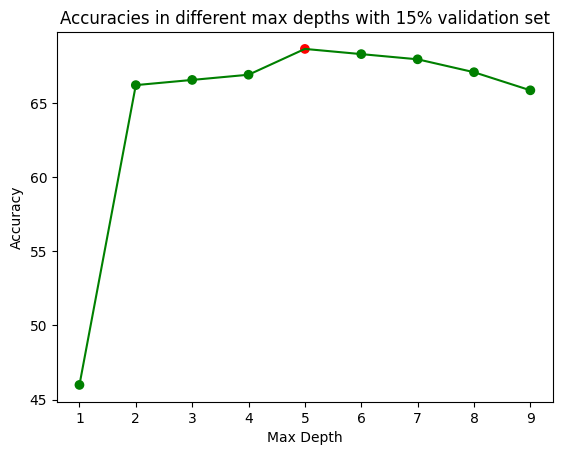

In [ ]:
colors = ['green'] * len(all_accs_dp)
colors[best_maxDepth] = 'red'
plt.scatter(max_depth_vals, all_accs_dp, marker='o', color=colors)
plt.plot(max_depth_vals, all_accs_dp, color='green')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracies in different max depths with 15% validation set')
plt.show()

In [ ]:
accs_bestDp = decTre_maxDp([best_maxDepth+1], x_train, x_test, y_train, y_test)
print(f'Best max_depth: {best_maxDepth + 1}')
print(f'Accuracy in test set for best max_depth: {accs_bestDp[0]} %')

Best max_depth: 5
Accuracy in test set for best max_depth: 69.93 %


## hyperparameter **max_features**

In [ ]:
def decTre_maxFt(max_fts, x_Train, x_Valid, y_Train, y_Valid):
  all_accs = list()
  for i in max_fts:
    clf = tree.DecisionTreeClassifier(max_features=i)
    clf = clf.fit(x_Train, y_Train)
    y_pred = clf.predict(x_Valid)
    acc = round(accuracy_score(y_Valid, y_pred) * 100, 2)
    all_accs.append(acc)
  return all_accs

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15) # 15% for test

In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.15) # 15% for validation

In [ ]:
max_Ft = range(1, 50)
all_accs = decTre_maxFt(max_Ft, x_train, x_valid, y_train, y_valid)
best_maxFt = all_accs.index(max(all_accs))

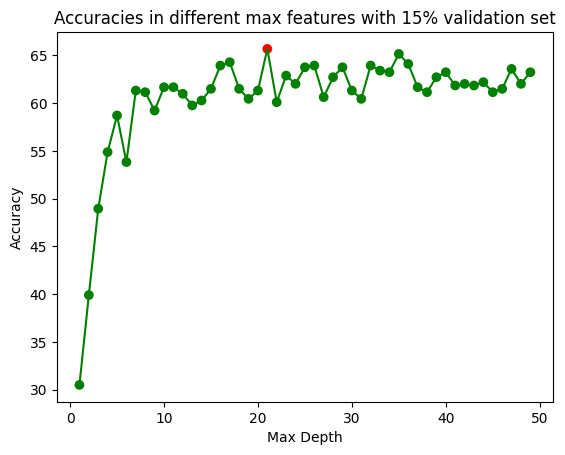

In [ ]:
colors = ['green'] * len(all_accs)
colors[best_maxFt] = 'red'
plt.scatter(max_Ft, all_accs, marker='o', color=colors)
plt.plot(max_Ft, all_accs, color='green')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracies in different max features with 15% validation set')
plt.show()

In [ ]:
accs_bestFt = decTre_maxFt([best_maxFt+1], x_train, x_test, y_train, y_test)
print(f'Best max_feature: {best_maxFt + 1}')
print(f'Accuracy in test set for best max_feature: {accs_bestDp[0]} %')

Best max_feature: 21
Accuracy in test set for best max_feature: 69.93 %


## Random Forest

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
rf_classifier = RandomForestClassifier() # number of decision trees = 100

In [ ]:
rf_classifier.fit(x_train, y_train)
y_pred = rf_classifier.predict(x_test)
acc = round(accuracy_score(y_test, y_pred) * 100, 2)
print(f'Accuracy in Random Forest: {acc} %')

Accuracy in Random Forest: 73.22 %


## Gradient Boosting

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
gb_classifier = GradientBoostingClassifier()

In [ ]:
gb_classifier.fit(x_train, y_train)
y_pred = gb_classifier.predict(x_test)
acc = round(accuracy_score(y_test, y_pred) * 100, 2)
print(f'Accuracy in Gradient Boosting: {acc} %')

Accuracy in Gradient Boosting: 71.56 %


## Learning Curve

In [ ]:
def draw_learn_cur(classifier, x, y, size_train, cv, scoring):
  train_sizes, train_scores, test_scores = learning_curve(estimator=classifier, X=x, y=y, train_sizes=size_train, cv=cv, scoring=scoring)
  mean_trainSc = np.mean(train_scores, axis=1)
  std_trainSc = np.std(train_scores, axis=1)
  mean_testSc = np.mean(test_scores, axis=1)
  std_testSc = np.std(test_scores, axis=1)
  diff_meanTraSc_stdTraSc = mean_trainSc - std_trainSc
  sum_meanTraSc_stdTraSc = mean_trainSc + std_trainSc
  diff_meanTestSc_stdTestSc = mean_testSc - std_testSc
  sum_meanTestSc_stdTestSc = mean_testSc + std_testSc
  plt.figure()
  plt.grid()
  plt.fill_between(train_sizes, diff_meanTraSc_stdTraSc, sum_meanTraSc_stdTraSc, alpha=0.1, color='orange')
  plt.fill_between(train_sizes, diff_meanTestSc_stdTestSc, sum_meanTestSc_stdTestSc, alpha=0.1, color='blue')
  plt.plot(train_sizes, mean_trainSc, 'o-', color='orange', label="Training Accuracy")
  plt.plot(train_sizes, mean_testSc, 'o-', color='blue', label="Test Accuracy")

In [ ]:
perc_train = [0.25, 0.5, 0.75, 1]

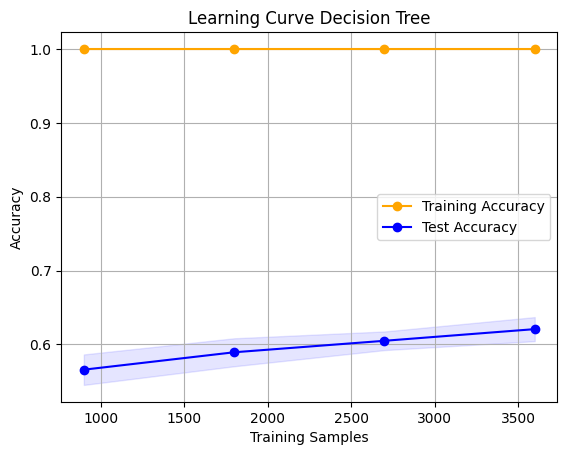

In [ ]:
dt_classifier = tree.DecisionTreeClassifier()
draw_learn_cur(dt_classifier, x, y, perc_train, 5, 'accuracy')
plt.legend(loc="center right")
plt.title("Learning Curve Decision Tree")
plt.xlabel("Training Samples")
plt.ylabel("Accuracy")
plt.show()

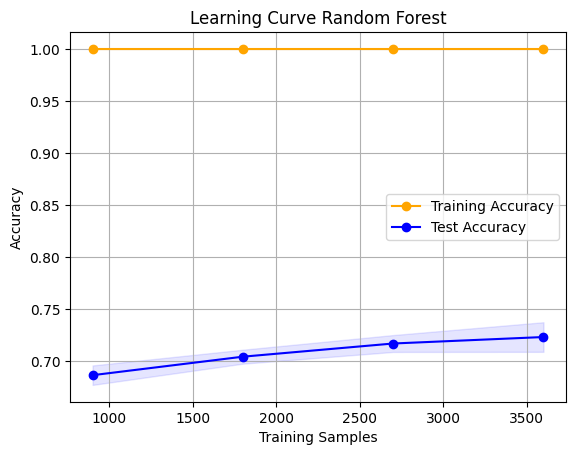

In [ ]:
rf_classifier = RandomForestClassifier()
draw_learn_cur(rf_classifier, x, y, perc_train, 5, 'accuracy')
plt.legend(loc="center right")
plt.title("Learning Curve Random Forest")
plt.xlabel("Training Samples")
plt.ylabel("Accuracy")
plt.show()

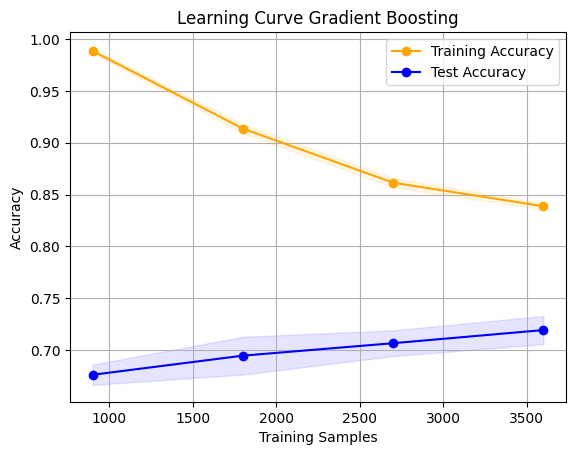

In [ ]:
gb_classifier = GradientBoostingClassifier()
draw_learn_cur(gb_classifier, x, y, perc_train, 5, 'accuracy')
plt.legend(loc="upper right")
plt.title("Learning Curve Gradient Boosting")
plt.xlabel("Training Samples")
plt.ylabel("Accuracy")
plt.show()